# Javier Palomares Homework 1 b

## 1. Correlations

* When given a data matrix, an easy way to tell if any two columns are correlated is to look at a scatter plot of each column against each other column. For a warm up, do this: Look at the data in DF1 in HW1b Data.zip.

In [21]:
df1FilePath="./DF1"
df2FilePath="./DF2"

import pandas as pd
df1 = pd.read_csv(df1FilePath,index_col=0)
df2 = pd.read_csv(df2FilePath,index_col=0)
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
0    10000 non-null float64
1    10000 non-null float64
2    10000 non-null float64
3    10000 non-null float64
dtypes: float64(4)
memory usage: 390.6 KB


0             1             2             3
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       0.007704      0.009313      0.007586     -0.008455
std        1.000779      1.002686      1.000794      1.002581
min       -3.471566     -4.056024     -3.524182     -3.930215
25%       -0.663449     -0.663886     -0.666489     -0.697856
50%        0.017736      0.009027      0.012372     -0.007986
75%        0.667565      0.695943      0.672933      0.668582
max        3.854101      3.908736      3.608846      3.985592

 Which columns are (pairwise) correlated? Figure out how to do this with Pandas, and also how to do this with Seaborn. 

In [37]:
df1.corr()

0         1         2         3
0  1.000000 -0.003998  0.990066  0.004111
1 -0.003998  1.000000 -0.004085 -0.990235
2  0.990066 -0.004085  1.000000  0.004067
3  0.004111 -0.990235  0.004067  1.000000

Using pandas, we see that columns at position 0 and position 2 are correlated, and columns at position 1 and 3 are negatively correlated

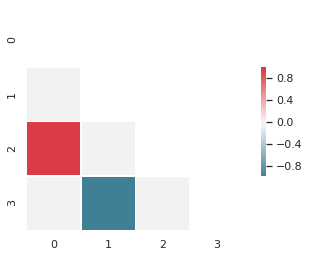

In [38]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style='white')
corr1 = df1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots();

# Generate a custom diverging colorma# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Using seaborn, I can see the correlation between columns 0 and 2, and the negative correlation between columns 1 and 3

* Compute the covariance matrix of the data. Write the explicit expression for what this
is, and then use any command you like (e.g., np.cov) to compute the 4 × 4 matrix.
Explain why the numbers that you get fit with the plots you got.

Let DF1 have size $n \times n$.
Let $x_i$ be the i-th column of DF1 and $x_i[j]$ be the j-th component of $x_i$.  
Note that columns of DF1 have $n$ components.
Let $\mu_i$ be the mean of $x_i$ and let $\sigma^2$ be the variance of $x_i$.  
Then the $i,j$ entry of the covariance matrix is given by:

$cov_{ij} =  \frac{1}{n} \sum_{k=1}^{n} (x_i[k] - \mu_i)(x_j[k] - \mu_j) $

In [39]:
df1.cov()

0         1         2         3
0  1.001558 -0.004012  0.991624  0.004125
1 -0.004012  1.005378 -0.004099 -0.995457
2  0.991624 -0.004099  1.001589  0.004081
3  0.004125 -0.995457  0.004081  1.005168

The values in the covariance matrix are consistent with the values in the correlation as they differ by a normalization factor.

* The above problem in reverse. Generate a zero-mean multivariate Gaussian random
variable in 3 dimensions, Z = (X1, X2, X3) so that (X1, X2) and (X1, X3) are uncorrelated, but (X2, X3) are correlated. Specifically: choose a covariance matrix that has the
above correlations structure, and write this down. Then find a way to generate samples
from this Gaussian. Choose one of the non-zero covariance terms (Cij , if C denotes
your covariance matrix) and plot it vs the estimated covariance term, as the number of
samples you use scales. The goal is to get a visual representation of how the empirical
covariance converges to the true (or family) covariance.

In [79]:
def estimateGaussianCov(mean,cov,numSamples,i,j):
    x = np.random.multivariate_normal(mean, cov,numSamples).T
    estCov = np.cov(x)
    c_ij = estCov[i][j]
    error = c_ij - cov[i][j]
    return error

mean = [0,0,0]
cov = [[1,0,0],[0,1,.99],[0,.99,1]]
#c_1,2 is non zero
i = 1
j = 2
numSamples = list(range(10,10000000,100000))
err = np.zeros(len(numSamples))
for k in range(len(numSamples)):
    n = numSamples[k]
    err[k] = estimateGaussianCov(mean,cov,n,i,j)

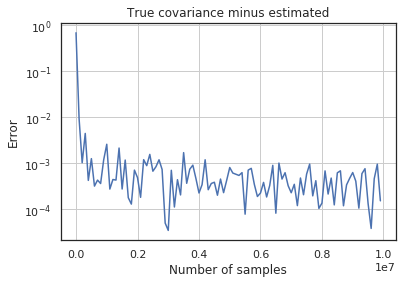

In [85]:
err = abs(err)
plt.semilogy(numSamples,err)
plt.title("True covariance minus estimated")
plt.grid(True)
plt.xlabel("Number of samples")
plt.ylabel("Absolute value of error")
plt.show()

## 2. Outliers
Consider the two-dimensional data in DF2 in HW1b Data.zip. Look at a scatter
plot of the data. It contains two points that look like potential outliers. Which one is “more”
outlying? Propose a transformation of the data that makes it clear that the point at (−1, 1)
is more outlying than the point at (5.5, 5), even though the latter point is“farther away”
from the nearest points. Plot the data again after performing this transformation. Provide
discussion as appropriate to justify your choice of transformation. Hint: if $y$ comes from a
standard Gaussian in two dimensions (i.e., with covariance equal to the two by two identity
matrix), and
$$
Q=
\begin{pmatrix}
2 & \frac{1}{2}\\
\frac{1}{2} & 2
\end{pmatrix}
$$
what is the covariance matrix of the random variable $\textbf{z} = Q\textbf{y}$?If you are given $z$, how would
you create a random Gaussian vector with covariance equal to the identity, using z?


In [82]:
df2FilePath="./DF2"

import pandas as pd
df2 = pd.read_csv(df2FilePath,index_col=0)
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
0    10000 non-null float64
1    10000 non-null float64
dtypes: float64(2)
memory usage: 234.4 KB


0             1
count  10000.000000  10000.000000
mean       0.008139      0.008169
std        1.002321      1.002078
min       -3.471566     -3.524182
25%       -0.663686     -0.666489
50%        0.017736      0.012527
75%        0.667909      0.673805
max        5.500000      5.000000

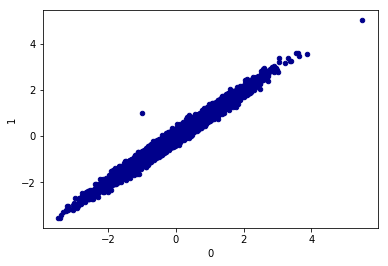

In [83]:
df2.plot.scatter(x=0,y=1,c='DarkBlue')

if $\textbf{z} = Q\textbf{y}$, then  
$Covar(\textbf{z}) = Q^T Covar(\textbf{y}) Q $  
and since $ Covar(\textbf{y}) = \mathbb{1} $ (identity matrix) then 
$Covar(\textbf{z}) = Q^T Q $.  
So by finding the covariance of $\textbf{z}$, we have $Q^T Q $.  
$Q$ can then be found using Cholesky decomposition.
Finally, we can get $\textbf{y}$ by  
$ \textbf{y} = Q^{-1} \textbf{z}$

In [93]:
covariance = df2.cov()
Q = np.linalg.cholesky(covariance)
Q_inv = np.linalg.inv(Q)
print(Q_inv)

[[ 0.99768418  0.        ]
 [-6.96054618  7.03339266]]


In [113]:
outlier1 = np.array([-1,1])
outlier2 = np.array([5.5,5])
print(np.dot(Q_inv,outlier1.T).T)
print(np.dot(Q_inv,outlier2.T).T)

[-0.99768418 13.99393883]
[ 5.48726302 -3.1160407 ]


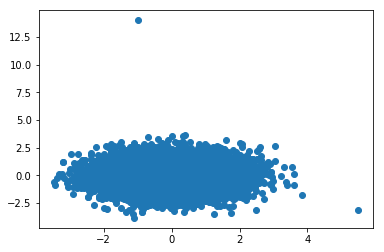

In [114]:
# the transformed data
z = np.dot(Q_inv,df2.T)
z = z.T
plt.scatter(z[:,0],z[:,1])
plt.show()

We can see that the point at (-1,1) has been mapped to a point further from the origin than (5.5,5) was mapped to. 

## 3. Even More Standard Error 
(This is to be completed only after you’ve completed the
last written exercise below). In one of the written exercises below, you derive an expression
1for what is called the Standard Error: where $\beta$ denotes the “truth,” $\hat{\beta}$ denotes the value we
compute using least squares linear regression, and $Z$ and $e$ are as in the exercise below, you
find:
$\hat{\beta} − \beta = Ze$.
If we know the distribution of the noise (the distribution generating the noise vectors, e i ),
then we know the distribution for the error, ( $\hat{\beta} − \beta$). This allows us to answer the question
given in class: if we solve a regression and obtain value $\hat{\beta}$, how can we tell if it is statistically
significant? The answer is: we compare the size of β̂ to the spread introduced by the noise
(i.e., the standard error), and we ask: what is the likelihood that the true $\beta = 0$, and what
we observed was purely due to the noise.
If the noise is Gaussian (normal), i.e., $e_i ∼ N(0, \sigma^2 )$, and if the values of the $x_i$ are normalized,
then we expect error of the size $\frac{\sigma}{\sqrt{n}}$, as this is roughly the standard deviation of the
expression for the error that you derive above. This means: if you have twice the data points,
you should expect the error to be reduced by about 1.4 (the formula says that the standard
deviation of the error would decrease by a factor of $1/\sqrt{2}$).


Compute this empirically, as follows: We will generate data for a regression problem, solve
it, and see what the error is: Generate data as I did in the example from class: 
$x_i ∼ N (0, 1)$,
$e i ∼ N (0, 1)$. Generate $y$ by $y_i = \beta_0 + x_i\beta + e_i$ , where $\beta_0 = −3$ and $\beta = 0$. Note that
since  $\beta = 0$, this means that y and x are unrelated! The question we are exploring here is as
follows: when we solve a regression problem, we are not going to find  $\hat{\beta} = 0$ - we will find
that $\hat{\beta}$ takes some other values, hopefully close to zero. How do we know if the value of $\hat{\beta}$ we
get is statistically meaningful?

In [118]:
beta0 = -3
beta = 0
meanX = 0
varX = 1
meanE = 0
varE = 1

* By creating fresh data and each time computing $\hat{\beta}$ and recording $\hat{\beta}$ − $\beta$, compute the
empirical standard deviation of the error for n = 150 (the number we used in class). In
class, in the exercise where I tried to find a linear regression of y vs. noise, we found
$\hat{\beta}= −0.15$. Given your empirical computation of the standard deviation of the error,
how significant is the value −0.15?

In [124]:
import numpy as np
import math
def computeBetaHat(meanX,varX,meanE,varE,n):
    # get x and e from an normal distribution
    x = np.random.normal(meanX,math.sqrt(varX),n)
    e = np.random.normal(meanE,math.sqrt(varE),n)
    # compute y from x and e
    y = beta0 + beta*x + e
    # expression computed from last problem of homework
    betaHat = np.dot(x,y) / np.dot(x,x)
    return betaHat

n = 150
betaHat = computeBetaHat(meanX,varX,meanE,varE,n)
print("The computed value of beta (betaHat) is {} for n={}".format(betaHat,n))

The computed value of beta (betaHat) is -0.2548654898775995 for n=150


In [125]:
def meanStdDevBeta(numTrials,meanX,varX,meanE,varE,n):
    betaSamples = np.zeros(numTrials)
    for i in range(numTrials):
        betaSamples[i] = computeBetaHat(meanX,varX,meanE,varE,n)
    meanBeta = np.mean(betaSamples)
    stdBeta = np.std(betaSamples)
    return meanBeta,stdBeta

In [126]:
# compute the standard deviation for the computed value of beta^ when n = 150
numTrials = 1000;
meanBeta,stdBeta = meanStdDevBeta(numTrials,meanX,varX,meanE,varE,n)
print("After {} trials, betaHat has a mean of {} with a standard deviation of {}".format(numTrials,meanBeta,stdBeta))

After 1000 trials, betaHat has a mean of -0.0009606705594536155 with a standard deviation of 0.2516646103140726


Finding a value for $\hat{\beta}=-0.15$ is about half a standard deviation away from the mean (using the empirical values)

* Now repeat the above experiment for different values of n. Plot these values, and on the
same plot, plot $1 / \sqrt{n}$. How is the fit?

In [129]:
sampleSizes = np.arange(150, 15000,100)
betaHatMean = np.zeros(len(sampleSizes))
betaHatStd = np.zeros(len(sampleSizes))
# compute the mean and stdDev for betaHat for different values of n
for i in range(len(sampleSizes)):
    betaHatMean[i],betaHatStd[i] = meanStdDevBeta(numTrials,meanX,varX,meanE,varE,sampleSizes[i])

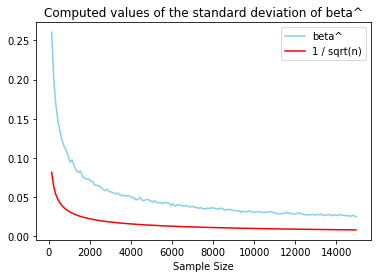

In [130]:
import matplotlib.pyplot as plt
plt.plot(sampleSizes,betaHatStd,color='skyblue',label = "beta^")
plt.plot(sampleSizes,1.0/np.sqrt(sampleSizes),color='red',label = '1 / sqrt(n)')
plt.title("Computed values of the standard deviation of beta^")
plt.xlabel("Sample Size")
plt.legend()

In [134]:
sigma = np.divide(betaHatStd,1.0/np.sqrt(sampleSizes))
k = np.mean(sigma)

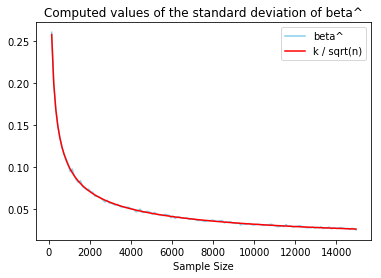

In [136]:
import matplotlib.pyplot as plt
plt.plot(sampleSizes,betaHatStd,color='skyblue',label = "beta^")
plt.plot(sampleSizes,k/np.sqrt(sampleSizes),color='red',label = 'k / sqrt(n)')
plt.title("Computed values of the standard deviation of beta^")
plt.xlabel("Sample Size")
plt.legend()

$\frac{1}{\sqrt{n}}$ is off from the empirical value of the standard deviation of $\hat{\beta}$ by a constant multiple.
If I instead plot $\frac{k}{\sqrt{n}}$ where k is the mean of $\frac{std(\hat{\beta})}{1.0/ \sqrt{n}}$, then the 2 lines are almost on top of each other.

## Names and Frequencies
The goal of this exercise is for you to get more experience with
Pandas, and to get a chance to explore a cool data set. Download the file Names.zip from
Canvas. This contains the frequency of all names that appeared more than 5 times on a social
security application from 1880 through 2015

* Write a program that on input k and XXXX, returns the top k names from year
XXXX.

In [46]:
import pandas as pd
def topKNames(k,year):
    # read the file containing the name frequency for the year
    filepath = "./Names/yob{}.txt".format(year)
    df = pd.read_csv(filepath,header=None)
    # first column of the dataframe is the name, followed by the gender and last by the frequency
    df.columns = ['name','gender','frequency']
    # sort the dataframe by the frequency in descending order
    df= df.sort_values(by='frequency',ascending=False)
    # return the name of the  first k rows of the data
    topKNames = df.iloc[0:k,0]
    return topKNames.to_list()

In [62]:
print(topKNames(7,1990))

['Michael', 'Christopher', 'Jessica', 'Ashley', 'Matthew', 'Joshua', 'Brittany']


* Write a program that on input Name returns the frequency for men and women of the
name $Name$.

In [101]:
# find the frequency of a name in a year for men and women
def freqMFNameByYear(name,year):
    # read the file containing the name frequency for the year
    filepath = "./Names/yob{}.txt".format(year)
    df = pd.read_csv(filepath,header=None)
    # first column of the dataframe is the name, followed by the gender and last by the frequency
    df.columns = ['name','gender','frequency']
    # find the rows for the give name using case insensitive comparison
    rows = df.loc[df['name'].str.lower() == name.lower()]
    # iterate over the rows
    menFrequency = 0
    womenFrequency = 0
    for index,row in rows.iterrows():
        if(row['gender'].lower() == 'm'):
            menFrequency += row['frequency']
        elif(row['gender'].lower() == 'f'):
            womenFrequency += row['frequency']
    return menFrequency,womenFrequency

In [105]:
men,women = freqMFNameByYear("Ashley",1990)
print("{} men were named Ashley in 1990. {} women were named Ashley in 1990".format(men,women))

239 men were named Ashley in 1990. 45553 women were named Ashley in 1990


* It could be that names are more diverse now than they were in 1880, so that a name may
be relatively the most popular, though its frequency may have been decreasing over the
years. Modify the above to return the relative frequency. Note that in the next coming
lectures we will learn how to quantify diversity using entropy.

In [136]:
def getTotalMWFreqByYear(year):
    filepath = "./Names/yob{}.txt".format(year)
    df = pd.read_csv(filepath,header=None)
     # first column of the dataframe is the name, followed by the gender and last by the frequency
    df.columns = ['name','gender','frequency']
    # find the total frequency for men and women
    menTotal = df.loc[df['gender'].str.lower() == "m"]['frequency'].sum()
    womenTotal = df.loc[df['gender'].str.lower() == "f"]['frequency'].sum() 
    return menTotal,womenTotal
    
# find the relative frequency of a name in a year for men and women
def relFreqMFNameByYear(name,year):
    # get the frequency of a name in a year for men and women
    men,women = freqMFNameByYear(name,year)
    menTotal,womenTotal = getTotalMWFreqByYear(year)
    return men/menTotal,women/womenTotal

In [137]:
men,women = relFreqMFNameByYear("Ashley",1990)
print("{}% of men were named Ashley in 1990. {}% of women were named Ashley in 1990".format(men*100,women*100))

0.011643417182176121% of men were named Ashley in 1990. 2.40029676358028% of women were named Ashley in 1990


* Find all the names that used to be more popular for one gender, but then became more
popular for another gender.

In [168]:
# TODO: Finish this
startYear = 1880
endYear = 2015
years = np.arange(startYear,endYear+1)
# initialize a dictionary for men and women to hold the count of a name per year
namesM = {}
namesW = {}
columns = ['name','gender','frequency']
for year in years:
    filepath = "./Names/yob{}.txt".format(year)
    df = pd.read_csv(filepath,header=None)
     # first column of the dataframe is the name, followed by the gender and last by the frequency
    df.columns = columns
    for index,row in df.iterrows():
        name = row['name']
        isFemale = row['gender'].lower() == 'f'
        frequency = row['frequency']
        if isFemale:
            names = namesW
        else:
            names = namesM
        counts = names.get(name,{})
        # store the frequency in the counts
        counts[year] = frequency
        names[name] = counts

In [191]:
import numpy as np
# now iterate over all the names and find if a name becomes more popular for one gender vs the other
for name,countsM in namesM.items():
    countsW = namesW.get(name,{})
    if len(countsW) == 0:
        # no women are named name
        continue
    # there are women with the name
    sign = None
    for year in years:
        numMen = countsM.get(year,0)
        numWomen = countsW.get(year,0)
        diff = numMen - numWomen
        s = np.sign(diff)
        if not sign:
            sign = s
            continue
        if (s != sign):
            sign = s
            if(s > 0):
                print("{} become more popular for men({}) that women({}) in {}".format(name,numMen,numWomen,year))  
            elif(s < 0):
                print("{} become more popular for women({}) that men({}) in {}".format(name,numWomen,numMen,year))
            else:
                print("{} became as popular for men({}) and women({}) in {}".format(name,numMen,numWomen,year))
                
# do the same for women's name
for name,countsW in namesW.items():
    countsM = namesM.get(name,{})
    if len(countsM) == 0:
        # no men are named name
        continue
    # there are men with the name
    sign = None
    for year in years:
        numMen = countsM.get(year,0)
        numWomen = countsW.get(year,0)
        diff = numMen - numWomen
        s = np.sign(diff)
        if not sign:
            sign = s
            continue
        if (s != sign):
            sign = s
            if (s > 0):
                print("{} become more popular for men({}) that women({}) in {}".format(name,numMen,numWomen,year))
            elif(s < 0):
                print("{} become more popular for women({}) that men({}) in {}".format(name,numWomen,numMen,year))
            else:
                print("{} became as popular for men({}) and women({}) in {}".format(name,numMen,numWomen,year))

Ed became as popular for men(0) and women(0) in 2012
Charley become more popular for women(63) that men(61) in 1987
Charley became as popular for men(56) and women(56) in 1990
Marion become more popular for women(184) that men(163) in 1883
Marion become more popular for men(184) that women(181) in 1884
Marion become more popular for women(198) that men(141) in 1885
Marion become more popular for men(299) that women(293) in 1972
Marion became as popular for men(229) and women(229) in 1977
Marion become more popular for women(211) that men(187) in 1981
Marion become more popular for men(169) that women(165) in 1984
Marion become more popular for women(168) that men(154) in 1985
Marion become more popular for men(164) that women(162) in 1986
Marion become more popular for women(150) that men(137) in 1987
Marion become more popular for men(117) that women(115) in 1996
Marion become more popular for women(141) that men(102) in 2000
Marion become more popular for men(158) that women(119) in 

Hollie became as popular for men(0) and women(0) in 1907
Hollie become more popular for women(19) that men(15) in 1910
Hollie became as popular for men(10) and women(10) in 1911
Hollie become more popular for women(15) that men(13) in 1913
Hollie become more popular for men(27) that women(11) in 1914
Hollie become more popular for women(22) that men(18) in 1943
Hollie become more popular for men(24) that women(18) in 1945
Hollie become more popular for women(21) that men(19) in 1946
Jarrett became as popular for men(0) and women(0) in 1881
Jarrett became as popular for men(0) and women(0) in 1885
Jarrett became as popular for men(0) and women(0) in 1900
Jessee became as popular for men(0) and women(0) in 1881
Jessee became as popular for men(0) and women(0) in 1885
Jessee became as popular for men(0) and women(0) in 1888
Jessee became as popular for men(0) and women(0) in 1893
Jessee became as popular for men(0) and women(0) in 1902
Jessee became as popular for men(0) and women(0) in 1

Woody became as popular for men(0) and women(0) in 1885
Woody became as popular for men(0) and women(0) in 1887
Woody became as popular for men(0) and women(0) in 1898
Woody became as popular for men(0) and women(0) in 1901
Woody became as popular for men(0) and women(0) in 1905
Woody became as popular for men(0) and women(0) in 2007
Jewell became as popular for men(0) and women(0) in 1881
Jewell become more popular for men(8) that women(0) in 1883
Jewell become more popular for women(6) that men(0) in 1884
Odell became as popular for men(0) and women(0) in 1885
Odell became as popular for men(7) and women(7) in 1889
Odell became as popular for men(0) and women(0) in 1891
Odell became as popular for men(0) and women(0) in 1893
Odell become more popular for women(13) that men(0) in 1896
Odell become more popular for men(13) that women(11) in 1897
Odell become more popular for women(12) that men(10) in 1898
Odell become more popular for men(12) that women(10) in 1899
Odell became as popu

Levie became as popular for men(0) and women(0) in 2006
Levie became as popular for men(0) and women(0) in 2008
Levie became as popular for men(0) and women(0) in 2011
Levie became as popular for men(0) and women(0) in 2013
Linnie became as popular for men(5) and women(5) in 1989
Linnie became as popular for men(0) and women(0) in 1993
Linnie became as popular for men(0) and women(0) in 1996
Linnie became as popular for men(0) and women(0) in 2000
Linnie became as popular for men(0) and women(0) in 2005
Linnie became as popular for men(0) and women(0) in 2008
Linnie became as popular for men(0) and women(0) in 2010
Linnie became as popular for men(0) and women(0) in 2012
Livingston became as popular for men(0) and women(0) in 1891
Livingston became as popular for men(0) and women(0) in 1904
Livingston became as popular for men(0) and women(0) in 1908
Livingston became as popular for men(0) and women(0) in 1938
Livingston became as popular for men(0) and women(0) in 1959
Livingston beca

Lyndon became as popular for men(0) and women(0) in 1908
Selwyn became as popular for men(0) and women(0) in 1905
Selwyn became as popular for men(0) and women(0) in 1940
Selwyn became as popular for men(0) and women(0) in 1943
Selwyn became as popular for men(0) and women(0) in 2000
Selwyn became as popular for men(0) and women(0) in 2006
Adan became as popular for men(0) and women(0) in 1905
Adan became as popular for men(0) and women(0) in 1913
Aurelio became as popular for men(0) and women(0) in 1905
Brownie became as popular for men(0) and women(0) in 1894
Brownie became as popular for men(0) and women(0) in 1898
Brownie became as popular for men(0) and women(0) in 1902
Brownie became as popular for men(0) and women(0) in 1906
Brownie become more popular for men(21) that women(17) in 1917
Brownie become more popular for women(26) that men(16) in 1918
Brownie became as popular for men(18) and women(18) in 1927
Brownie became as popular for men(17) and women(17) in 1934
Brownie beca

Marcell become more popular for men(14) that women(13) in 1955
Marcell become more popular for women(18) that men(9) in 1957
Marcell become more popular for men(23) that women(19) in 1958
Marcell become more popular for women(23) that men(17) in 1959
Marcell become more popular for men(23) that women(22) in 1961
Marcell become more popular for women(24) that men(17) in 1962
Marcell become more popular for men(19) that women(18) in 1963
Mc became as popular for men(0) and women(0) in 1913
Mc became as popular for men(0) and women(0) in 1920
Mc became as popular for men(0) and women(0) in 1927
Mc became as popular for men(0) and women(0) in 1929
Mc became as popular for men(0) and women(0) in 1936
Mc became as popular for men(0) and women(0) in 1940
Mc became as popular for men(0) and women(0) in 1945
Mc became as popular for men(0) and women(0) in 1948
Mc become more popular for men(7) that women(0) in 1991
Mc become more popular for women(8) that men(0) in 1992
Mc became as popular for

Santi became as popular for men(0) and women(0) in 1983
Santi became as popular for men(0) and women(0) in 1995
Santi became as popular for men(0) and women(0) in 1998
Santi became as popular for men(0) and women(0) in 2000
Santi became as popular for men(0) and women(0) in 2006
Verlyn became as popular for men(0) and women(0) in 1913
Verlyn became as popular for men(16) and women(16) in 1922
Verlyn became as popular for men(0) and women(0) in 1970
Verlyn became as popular for men(0) and women(0) in 1973
Verlyn became as popular for men(0) and women(0) in 1977
Verlyn became as popular for men(0) and women(0) in 1985
Verlyn became as popular for men(0) and women(0) in 1998
Adair become more popular for women(10) that men(5) in 1916
Adair became as popular for men(8) and women(8) in 1919
Adair became as popular for men(8) and women(8) in 1928
Adair became as popular for men(5) and women(5) in 1933
Adair became as popular for men(0) and women(0) in 1935
Adair become more popular for men(7

Plumer became as popular for men(0) and women(0) in 1922
Plumer became as popular for men(0) and women(0) in 1925
Plumer became as popular for men(0) and women(0) in 1928
Plumer became as popular for men(0) and women(0) in 1930
Plumer became as popular for men(0) and women(0) in 1932
Randy became as popular for men(0) and women(0) in 1917
Randy became as popular for men(0) and women(0) in 1921
Randy became as popular for men(5) and women(5) in 1924
Renie became as popular for men(0) and women(0) in 1895
Renie became as popular for men(6) and women(6) in 1915
Renie became as popular for men(0) and women(0) in 1918
Renie became as popular for men(0) and women(0) in 1923
Renie became as popular for men(0) and women(0) in 1931
Renie became as popular for men(0) and women(0) in 1933
Renie became as popular for men(0) and women(0) in 1935
Renie became as popular for men(0) and women(0) in 1941
Renie became as popular for men(0) and women(0) in 1967
Renie became as popular for men(0) and wome

Dene become more popular for women(7) that men(6) in 1934
Dene became as popular for men(0) and women(0) in 1935
Dene become more popular for women(7) that men(0) in 1942
Dene become more popular for men(5) that women(0) in 1943
Dene become more popular for women(7) that men(5) in 1945
Dene become more popular for men(10) that women(6) in 1947
Dene become more popular for women(11) that men(0) in 1950
Dene became as popular for men(6) and women(6) in 1951
Dene become more popular for women(10) that men(0) in 1953
Dene become more popular for men(8) that women(7) in 1955
Dene become more popular for women(15) that men(6) in 1956
Dene become more popular for men(9) that women(6) in 1957
Dene become more popular for women(9) that men(0) in 1958
Dene become more popular for men(9) that women(7) in 1959
Dene become more popular for women(10) that men(7) in 1960
Dene became as popular for men(6) and women(6) in 1971
Dene became as popular for men(6) and women(6) in 1973
Dene became as popula

Doye became as popular for men(0) and women(0) in 1949
Doye became as popular for men(0) and women(0) in 1954
Doye became as popular for men(0) and women(0) in 1957
Doye became as popular for men(0) and women(0) in 1960
Doye became as popular for men(0) and women(0) in 1962
Doye became as popular for men(0) and women(0) in 1965
Efrain became as popular for men(0) and women(0) in 1921
Efrain became as popular for men(0) and women(0) in 1923
Eron became as popular for men(0) and women(0) in 1895
Eron became as popular for men(0) and women(0) in 1904
Eron became as popular for men(0) and women(0) in 1919
Eron become more popular for men(5) that women(0) in 1923
Eron became as popular for men(0) and women(0) in 1924
Eron became as popular for men(0) and women(0) in 1926
Eron became as popular for men(0) and women(0) in 1945
Eron became as popular for men(0) and women(0) in 1953
Eron become more popular for women(6) that men(5) in 1965
Eron become more popular for men(10) that women(0) in 1

Laurien became as popular for men(0) and women(0) in 1988
Linzey became as popular for men(0) and women(0) in 1928
Linzey became as popular for men(0) and women(0) in 1934
Linzey became as popular for men(0) and women(0) in 1946
Linzey became as popular for men(0) and women(0) in 2012
Mozelle became as popular for men(0) and women(0) in 1888
Mozelle became as popular for men(0) and women(0) in 1890
Mozelle became as popular for men(0) and women(0) in 1893
Mozelle became as popular for men(0) and women(0) in 1963
Mozelle became as popular for men(0) and women(0) in 1967
Mozelle became as popular for men(0) and women(0) in 1972
Mozelle became as popular for men(0) and women(0) in 1975
Mozelle became as popular for men(0) and women(0) in 1978
Mozelle became as popular for men(0) and women(0) in 1992
Mozelle became as popular for men(0) and women(0) in 1994
Mozelle became as popular for men(0) and women(0) in 2003
Mozelle became as popular for men(0) and women(0) in 2007
Mozelle became as 

Storm became as popular for men(0) and women(0) in 1959
Storm become more popular for women(6) that men(0) in 1961
Storm become more popular for men(6) that women(0) in 1962
Storm become more popular for women(7) that men(5) in 1963
Storm become more popular for men(6) that women(5) in 1965
Storm became as popular for men(0) and women(0) in 1966
Storm became as popular for men(0) and women(0) in 1970
Storm become more popular for men(6) that women(0) in 1972
Storm become more popular for women(6) that men(0) in 1973
Storm became as popular for men(0) and women(0) in 1977
Storm become more popular for women(52) that men(46) in 2007
Storm become more popular for men(51) that women(40) in 2008
Storm become more popular for women(52) that men(50) in 2013
Storm become more popular for men(62) that women(58) in 2014
Storm become more popular for women(76) that men(63) in 2015
Tary became as popular for men(0) and women(0) in 1947
Tary became as popular for men(0) and women(0) in 1950
Tary be

Verneal became as popular for men(0) and women(0) in 1947
Verneal became as popular for men(0) and women(0) in 1950
Verneal became as popular for men(0) and women(0) in 1952
Verneal became as popular for men(0) and women(0) in 1959
Nikita became as popular for men(0) and women(0) in 1950
Nikita became as popular for men(0) and women(0) in 1954
Nikita become more popular for men(117) that women(106) in 2008
Nikita become more popular for women(121) that men(103) in 2010
Nikita become more popular for men(98) that women(79) in 2014
Nikita become more popular for women(93) that men(92) in 2015
Ronan became as popular for men(0) and women(0) in 1960
Ronan became as popular for men(0) and women(0) in 1966
Ronan became as popular for men(0) and women(0) in 1974
Ronan became as popular for men(0) and women(0) in 1977
Skylar became as popular for men(0) and women(0) in 1960
Skylar became as popular for men(0) and women(0) in 1964
Skylar became as popular for men(0) and women(0) in 1969
Skylar 

Marnell became as popular for men(0) and women(0) in 2009
Marnell became as popular for men(0) and women(0) in 2013
Nichol became as popular for men(0) and women(0) in 1945
Nichol became as popular for men(0) and women(0) in 2004
Nichol became as popular for men(0) and women(0) in 2010
Nichol became as popular for men(0) and women(0) in 2015
Pasha became as popular for men(0) and women(0) in 1965
Pasha become more popular for men(9) that women(8) in 1983
Pasha become more popular for women(7) that men(0) in 1984
Pasha become more popular for men(7) that women(6) in 1987
Pasha become more popular for women(11) that men(6) in 1988
Pasha become more popular for men(11) that women(8) in 1998
Pasha become more popular for women(8) that men(7) in 1999
Pasha become more popular for men(9) that women(0) in 2001
Pasha become more popular for women(9) that men(8) in 2003
Pasha became as popular for men(9) and women(9) in 2004
Pasha become more popular for men(11) that women(9) in 2007
Pasha beco

Keshawn become more popular for men(12) that women(6) in 1978
Keshawn become more popular for women(10) that men(9) in 1980
Keshawn become more popular for men(16) that women(8) in 1981
Keshawn became as popular for men(10) and women(10) in 1983
Keshawn became as popular for men(8) and women(8) in 1985
Keshawn became as popular for men(12) and women(12) in 1987
Marquell became as popular for men(0) and women(0) in 1974
Marquell became as popular for men(0) and women(0) in 1978
Marshon became as popular for men(0) and women(0) in 1972
Marshon became as popular for men(0) and women(0) in 1979
Marshon became as popular for men(0) and women(0) in 1983
Marshon became as popular for men(0) and women(0) in 1986
Mikki became as popular for men(0) and women(0) in 1944
Mikki became as popular for men(0) and women(0) in 2005
Mikki became as popular for men(0) and women(0) in 2014
Mosi became as popular for men(0) and women(0) in 1978
Mosi became as popular for men(0) and women(0) in 1980
Mosi bec

Keonte become more popular for men(7) that women(5) in 1984
Lakesha became as popular for men(0) and women(0) in 2009
Latisha became as popular for men(0) and women(0) in 1955
Lawanda became as popular for men(0) and women(0) in 2005
Lawanda became as popular for men(0) and women(0) in 2010
Leshaun became as popular for men(0) and women(0) in 1972
Leshaun became as popular for men(0) and women(0) in 1976
Leshaun became as popular for men(0) and women(0) in 1982
Leshaun became as popular for men(0) and women(0) in 1987
Leshaun became as popular for men(0) and women(0) in 1990
Leshaun became as popular for men(0) and women(0) in 1992
Leshaun become more popular for women(5) that men(0) in 1998
Leshaun become more popular for men(7) that women(0) in 1999
Leshaun became as popular for men(0) and women(0) in 2010
Leshaun became as popular for men(0) and women(0) in 2012
Leshaun became as popular for men(0) and women(0) in 2015
Mazi became as popular for men(0) and women(0) in 1978
Mazi beca

Dusti became as popular for men(0) and women(0) in 1964
Dusti became as popular for men(0) and women(0) in 1966
Juliana became as popular for men(0) and women(0) in 1882
Juliana became as popular for men(0) and women(0) in 1897
Belen became as popular for men(0) and women(0) in 1911
Delorean became as popular for men(0) and women(0) in 1993
Delorean became as popular for men(0) and women(0) in 1997
Delorean became as popular for men(0) and women(0) in 2010
Delorean became as popular for men(0) and women(0) in 2012
Kassidy became as popular for men(0) and women(0) in 1977
Antwana became as popular for men(0) and women(0) in 1979
Antwana became as popular for men(0) and women(0) in 1983
Cagney become more popular for women(11) that men(0) in 1983
Cagney become more popular for men(31) that women(14) in 1984
Cagney become more popular for women(31) that men(30) in 1985
Cagney become more popular for men(9) that women(0) in 1989
Cagney become more popular for women(6) that men(0) in 1990
C

Rei became as popular for men(0) and women(0) in 1996
Rei became as popular for men(9) and women(9) in 1999
Rei became as popular for men(12) and women(12) in 2002
Rei became as popular for men(13) and women(13) in 2004
Rei became as popular for men(8) and women(8) in 2006
Rei become more popular for men(21) that women(10) in 2008
Rei become more popular for women(21) that men(14) in 2011
Rei become more popular for men(9) that women(5) in 2014
Riely became as popular for men(0) and women(0) in 1988
Riely become more popular for women(7) that men(0) in 1996
Riely become more popular for men(9) that women(5) in 1997
Riely become more popular for women(11) that men(10) in 1999
Riely become more popular for men(12) that women(6) in 2000
Riely become more popular for women(12) that men(10) in 2001
Riely become more popular for men(13) that women(10) in 2002
Riely become more popular for women(13) that men(9) in 2003
Riely become more popular for men(15) that women(11) in 2007
Riely become 

Tristyn became as popular for men(0) and women(0) in 1983
Tristyn became as popular for men(85) and women(85) in 2005
Xzavia became as popular for men(0) and women(0) in 1992
Xzavia became as popular for men(0) and women(0) in 1994
Xzavia became as popular for men(5) and women(5) in 1996
Xzavia became as popular for men(0) and women(0) in 1998
Xzavia became as popular for men(0) and women(0) in 2001
Xzavia became as popular for men(0) and women(0) in 2003
Xzavia became as popular for men(0) and women(0) in 2005
Xzavia became as popular for men(0) and women(0) in 2008
Xzavia became as popular for men(0) and women(0) in 2012
Caelan become more popular for men(35) that women(0) in 1992
Caelan became as popular for men(75) and women(75) in 2003
Jaleen became as popular for men(0) and women(0) in 1958
Jaleen became as popular for men(0) and women(0) in 1965
Jaleen became as popular for men(0) and women(0) in 1967
Jaleen became as popular for men(0) and women(0) in 1969
Jaleen became as popu

Adar became as popular for men(0) and women(0) in 2004
Adar became as popular for men(0) and women(0) in 2006
Adar become more popular for women(6) that men(0) in 2008
Adar become more popular for men(8) that women(0) in 2009
Adar became as popular for men(0) and women(0) in 2011
Adar became as popular for men(0) and women(0) in 2013
Arda became as popular for men(0) and women(0) in 1890
Arda became as popular for men(0) and women(0) in 1938
Arda became as popular for men(0) and women(0) in 1941
Arda became as popular for men(0) and women(0) in 1944
Arda became as popular for men(0) and women(0) in 1950
Arda became as popular for men(0) and women(0) in 1965
Arda became as popular for men(0) and women(0) in 1997
Arda became as popular for men(0) and women(0) in 2001
Arshdeep become more popular for men(6) that women(0) in 1997
Arshdeep became as popular for men(0) and women(0) in 2007
Arshdeep became as popular for men(0) and women(0) in 2009
Arshdeep became as popular for men(0) and wo

Kweli became as popular for men(0) and women(0) in 1975
Kweli became as popular for men(0) and women(0) in 1979
Kyi became as popular for men(0) and women(0) in 2002
Kyi became as popular for men(0) and women(0) in 2005
Kyi became as popular for men(0) and women(0) in 2008
Kyi become more popular for men(11) that women(0) in 2010
Kyi become more popular for women(5) that men(0) in 2012
Kyi became as popular for men(6) and women(6) in 2014
Kymari became as popular for men(0) and women(0) in 2001
Kymari become more popular for women(7) that men(6) in 2004
Kymari become more popular for men(13) that women(12) in 2005
Kymari become more popular for women(9) that men(6) in 2006
Kymari become more popular for men(17) that women(14) in 2007
Lennix became as popular for men(0) and women(0) in 2001
Lennix became as popular for men(0) and women(0) in 2008
Lennix become more popular for women(14) that men(13) in 2013
Maysen become more popular for men(24) that women(23) in 2008
Maysen become more

Sovereign became as popular for men(0) and women(0) in 2011
Sovereign become more popular for women(6) that men(0) in 2013
Sovereign become more popular for men(8) that women(0) in 2014
Takaya became as popular for men(0) and women(0) in 1997
Takaya became as popular for men(0) and women(0) in 2001
Takaya became as popular for men(0) and women(0) in 2007
Takaya became as popular for men(0) and women(0) in 2010
Tamarr became as popular for men(0) and women(0) in 1977
Tamarr became as popular for men(0) and women(0) in 2007
Taydem became as popular for men(6) and women(6) in 2011
Taydem become more popular for women(5) that men(0) in 2013
Taytum became as popular for men(0) and women(0) in 1993
Taziyah became as popular for men(5) and women(5) in 2005
Toluwani become more popular for men(5) that women(0) in 2006
Toluwani became as popular for men(0) and women(0) in 2007
Toluwani become more popular for men(9) that women(0) in 2010
Toluwani became as popular for men(6) and women(6) in 201

Quincie became as popular for men(0) and women(0) in 2014
Rayann became as popular for men(0) and women(0) in 1935
Rayann became as popular for men(0) and women(0) in 1944
Rayann became as popular for men(0) and women(0) in 1948
Rayann became as popular for men(0) and women(0) in 1951
Salma became as popular for men(0) and women(0) in 1919
Salma became as popular for men(0) and women(0) in 1976
Salma became as popular for men(0) and women(0) in 1979
Seely became as popular for men(0) and women(0) in 2013
Shree became as popular for men(0) and women(0) in 1960
Shree became as popular for men(0) and women(0) in 1993
Shree became as popular for men(0) and women(0) in 1998
Soryn become more popular for men(5) that women(0) in 2012
Soryn become more popular for women(7) that men(0) in 2013
Soryn became as popular for men(5) and women(5) in 2014
Vader became as popular for men(0) and women(0) in 1901
Vader became as popular for men(0) and women(0) in 1906
Vader became as popular for men(0) a

Adell become more popular for women(11) that men(0) in 1986
Adell become more popular for men(8) that women(0) in 1990
Adell become more popular for women(9) that men(0) in 1991
Adell became as popular for men(0) and women(0) in 1992
Adell became as popular for men(0) and women(0) in 2006
Lonie become more popular for women(11) that men(6) in 1881
Lonie become more popular for men(9) that women(0) in 1882
Lonie become more popular for women(14) that men(5) in 1883
Lonie become more popular for men(8) that women(7) in 1884
Lonie become more popular for women(14) that men(6) in 1885
Lonie became as popular for men(33) and women(33) in 1921
Lonie become more popular for men(23) that women(20) in 1927
Lonie became as popular for men(15) and women(15) in 1929
Lonie become more popular for men(18) that women(16) in 1932
Lonie become more popular for women(17) that men(11) in 1935
Lonie became as popular for men(16) and women(16) in 1937
Lonie become more popular for women(13) that men(9) in 

Lacey became as popular for men(0) and women(0) in 1887
Lacey became as popular for men(0) and women(0) in 1889
Lacey become more popular for women(6) that men(0) in 1903
Lacey became as popular for men(0) and women(0) in 1904
Lacey became as popular for men(0) and women(0) in 1908
Lacey became as popular for men(10) and women(10) in 1944
Lacey became as popular for men(13) and women(13) in 1947
Lacey become more popular for women(19) that men(17) in 1954
Lacey became as popular for men(16) and women(16) in 1955
Lacey become more popular for women(23) that men(12) in 1957
Mariana became as popular for men(0) and women(0) in 1891
Mariana became as popular for men(0) and women(0) in 1894
Mariana became as popular for men(0) and women(0) in 1897
Mariana became as popular for men(0) and women(0) in 1904
Marta became as popular for men(0) and women(0) in 1889
Marta became as popular for men(0) and women(0) in 1899
Marta became as popular for men(0) and women(0) in 1902
Marta became as popul

Irby became as popular for men(0) and women(0) in 1984
Irby became as popular for men(0) and women(0) in 1992
Kansas became as popular for men(0) and women(0) in 1899
Kansas became as popular for men(0) and women(0) in 1901
Kansas became as popular for men(0) and women(0) in 1909
Kansas became as popular for men(0) and women(0) in 1912
Kansas became as popular for men(0) and women(0) in 1914
Kansas became as popular for men(0) and women(0) in 1916
Kansas became as popular for men(0) and women(0) in 1921
Kansas became as popular for men(0) and women(0) in 1925
Kansas became as popular for men(0) and women(0) in 1928
Lacie became as popular for men(0) and women(0) in 1901
Lacie became as popular for men(0) and women(0) in 1903
Lacie became as popular for men(0) and women(0) in 1906
Lacie became as popular for men(0) and women(0) in 1913
Lacie become more popular for men(6) that women(0) in 1918
Lacie become more popular for women(7) that men(0) in 1919
Lacie became as popular for men(8) 

Halley became as popular for men(0) and women(0) in 1919
Halley became as popular for men(0) and women(0) in 1923
Halley become more popular for women(7) that men(0) in 1925
Halley became as popular for men(0) and women(0) in 1926
Halley became as popular for men(0) and women(0) in 1932
Halley became as popular for men(0) and women(0) in 1935
Halley became as popular for men(0) and women(0) in 1940
Halley became as popular for men(0) and women(0) in 1942
Halley became as popular for men(0) and women(0) in 1944
Halley became as popular for men(0) and women(0) in 1949
Halley became as popular for men(0) and women(0) in 1952
Halley became as popular for men(0) and women(0) in 1958
Halley became as popular for men(0) and women(0) in 1965
Clovis became as popular for men(0) and women(0) in 1881
Clovis became as popular for men(0) and women(0) in 1889
Clovis became as popular for men(0) and women(0) in 1891
Clovis became as popular for men(0) and women(0) in 1894
Clovis became as popular for

Merced became as popular for men(0) and women(0) in 1941
Merced became as popular for men(0) and women(0) in 1943
Merced became as popular for men(0) and women(0) in 1958
Merced become more popular for women(7) that men(0) in 1963
Merced become more popular for men(6) that women(0) in 1964
Merced became as popular for men(0) and women(0) in 1971
Merced become more popular for women(6) that men(0) in 1980
Merced become more popular for men(8) that women(6) in 1981
Merced become more popular for women(8) that men(6) in 1990
Merced become more popular for men(9) that women(5) in 1991
Merced became as popular for men(0) and women(0) in 2001
Merced became as popular for men(0) and women(0) in 2004
Merced became as popular for men(0) and women(0) in 2006
Merced became as popular for men(0) and women(0) in 2009
Merced became as popular for men(0) and women(0) in 2011
Merced became as popular for men(0) and women(0) in 2014
Nicolette became as popular for men(0) and women(0) in 1915
Nicolette 

Lin became as popular for men(7) and women(7) in 2013
Lin became as popular for men(6) and women(6) in 2015
Manon became as popular for men(0) and women(0) in 1918
Manon became as popular for men(0) and women(0) in 1922
Manon became as popular for men(0) and women(0) in 1930
Manon became as popular for men(0) and women(0) in 1933
Manon became as popular for men(0) and women(0) in 1937
Manon became as popular for men(0) and women(0) in 1940
Manon became as popular for men(0) and women(0) in 1945
Manon became as popular for men(0) and women(0) in 1947
Manon became as popular for men(0) and women(0) in 1951
Manon became as popular for men(0) and women(0) in 1976
Manon became as popular for men(0) and women(0) in 1981
Manon became as popular for men(0) and women(0) in 1985
Manon became as popular for men(0) and women(0) in 2015
Marty became as popular for men(0) and women(0) in 1897
Marty became as popular for men(0) and women(0) in 1906
Marty became as popular for men(0) and women(0) in 1

Glyndon became as popular for men(0) and women(0) in 1940
Glyndon became as popular for men(0) and women(0) in 1943
Glyndon become more popular for women(5) that men(0) in 1948
Glyndon became as popular for men(0) and women(0) in 1949
Glyndon became as popular for men(0) and women(0) in 1952
Glyndon became as popular for men(0) and women(0) in 1955
Glyndon became as popular for men(0) and women(0) in 1957
Hansel became as popular for men(0) and women(0) in 1906
Hansel became as popular for men(0) and women(0) in 1973
Ivonne became as popular for men(0) and women(0) in 1923
Ivonne became as popular for men(0) and women(0) in 1928
Ivonne became as popular for men(0) and women(0) in 1941
Jana became as popular for men(0) and women(0) in 1930
Jissie became as popular for men(0) and women(0) in 1920
Jissie became as popular for men(0) and women(0) in 1922
Jissie become more popular for women(5) that men(0) in 1924
Jissie became as popular for men(0) and women(0) in 1925
Jissie became as pop

Sherril became as popular for men(0) and women(0) in 1974
Sherril became as popular for men(0) and women(0) in 1981
Sherril became as popular for men(0) and women(0) in 1984
Sherril became as popular for men(0) and women(0) in 1987
Sherron became as popular for men(0) and women(0) in 1934
Sherron became as popular for men(8) and women(8) in 1985
Sherron become more popular for men(18) that women(15) in 1994
Sherron become more popular for women(8) that men(7) in 1998
Sherron become more popular for men(9) that women(8) in 1999
Sherron become more popular for women(11) that men(5) in 2000
Sherron become more popular for men(11) that women(0) in 2001
Sherron became as popular for men(0) and women(0) in 2003
Sherron became as popular for men(0) and women(0) in 2007
Sherron became as popular for men(0) and women(0) in 2014
Andria became as popular for men(0) and women(0) in 1934
Andria became as popular for men(0) and women(0) in 1936
Conny became as popular for men(0) and women(0) in 1932

Corey became as popular for men(0) and women(0) in 1922
Corey became as popular for men(0) and women(0) in 1927
Corey became as popular for men(0) and women(0) in 1929
Corey became as popular for men(0) and women(0) in 1938
Corey became as popular for men(0) and women(0) in 1941
Elyn became as popular for men(0) and women(0) in 1947
Elyn became as popular for men(0) and women(0) in 1951
Elyn became as popular for men(0) and women(0) in 1956
Elyn became as popular for men(0) and women(0) in 1963
Elyn became as popular for men(0) and women(0) in 1969
Elyn became as popular for men(0) and women(0) in 1982
Elyn became as popular for men(0) and women(0) in 1988
Elyn became as popular for men(0) and women(0) in 1991
Elyn became as popular for men(0) and women(0) in 1993
Elyn became as popular for men(0) and women(0) in 2003
Glendale became as popular for men(0) and women(0) in 1916
Glendale became as popular for men(0) and women(0) in 1923
Glendale became as popular for men(0) and women(0) i

Donel became as popular for men(0) and women(0) in 2012
Donel became as popular for men(0) and women(0) in 2015
Gregg became as popular for men(0) and women(0) in 1882
Gregg became as popular for men(0) and women(0) in 1929
Hollister became as popular for men(0) and women(0) in 1929
Hollister became as popular for men(0) and women(0) in 1956
Hollister became as popular for men(0) and women(0) in 1974
Hollister became as popular for men(0) and women(0) in 1978
Hollister became as popular for men(0) and women(0) in 1991
Hollister became as popular for men(0) and women(0) in 1993
Hollister became as popular for men(0) and women(0) in 2013
Jamia became as popular for men(0) and women(0) in 1955
Jamia became as popular for men(0) and women(0) in 1960
Jamia became as popular for men(0) and women(0) in 1962
Jernell became as popular for men(0) and women(0) in 1955
Jernell became as popular for men(0) and women(0) in 1972
Jernell became as popular for men(0) and women(0) in 1978
Jernell became

Rasha became as popular for men(0) and women(0) in 1962
Raymie become more popular for women(9) that men(0) in 1968
Raymie became as popular for men(5) and women(5) in 1969
Raymie became as popular for men(0) and women(0) in 1972
Raymie become more popular for men(5) that women(0) in 1976
Raymie become more popular for women(7) that men(0) in 1978
Raymie became as popular for men(0) and women(0) in 1979
Raymie become more popular for men(5) that women(0) in 1981
Raymie became as popular for men(0) and women(0) in 1982
Raymie became as popular for men(0) and women(0) in 1989
Raymie became as popular for men(0) and women(0) in 1994
Raymie became as popular for men(0) and women(0) in 1998
Raymie became as popular for men(0) and women(0) in 2001
Raymie became as popular for men(0) and women(0) in 2010
Raymie became as popular for men(0) and women(0) in 2012
Romi became as popular for men(0) and women(0) in 1962
Romi became as popular for men(0) and women(0) in 1974
Romi became as popular f

Donique become more popular for women(5) that men(0) in 1998
Donique became as popular for men(0) and women(0) in 1999
Donique became as popular for men(0) and women(0) in 2002
Donique became as popular for men(0) and women(0) in 2004
Barclay became as popular for men(0) and women(0) in 1916
Barclay became as popular for men(0) and women(0) in 1921
Barclay became as popular for men(0) and women(0) in 1924
Barclay became as popular for men(0) and women(0) in 1927
Barclay became as popular for men(0) and women(0) in 1998
Barclay became as popular for men(0) and women(0) in 2000
Barclay became as popular for men(0) and women(0) in 2002
Barclay became as popular for men(0) and women(0) in 2006
Barclay became as popular for men(0) and women(0) in 2010
Barclay became as popular for men(0) and women(0) in 2012
Rommy became as popular for men(0) and women(0) in 1939
Rommy became as popular for men(0) and women(0) in 1970
Rommy became as popular for men(0) and women(0) in 1986
Rommy became as p

Olayinka became as popular for men(0) and women(0) in 1993
Olayinka become more popular for men(5) that women(0) in 1995
Olayinka became as popular for men(0) and women(0) in 1996
Olayinka became as popular for men(0) and women(0) in 1998
Olayinka became as popular for men(0) and women(0) in 2008
Soma became as popular for men(0) and women(0) in 1974
Soma became as popular for men(0) and women(0) in 1981
Soma became as popular for men(0) and women(0) in 1999
Soma became as popular for men(0) and women(0) in 2001
Soma become more popular for men(5) that women(0) in 2004
Soma became as popular for men(0) and women(0) in 2005
Soma became as popular for men(0) and women(0) in 2007
Soma became as popular for men(0) and women(0) in 2011
Soma became as popular for men(0) and women(0) in 2013
Abi became as popular for men(0) and women(0) in 1974
Abi became as popular for men(0) and women(0) in 1977
Abi became as popular for men(0) and women(0) in 1988
Abi became as popular for men(0) and women

Chaska became as popular for men(0) and women(0) in 1978
Chaska became as popular for men(0) and women(0) in 1981
Chaska became as popular for men(0) and women(0) in 2003
Chaska became as popular for men(0) and women(0) in 2008
Chaska became as popular for men(0) and women(0) in 2011
Chaska became as popular for men(0) and women(0) in 2015
Chyenne became as popular for men(0) and women(0) in 1980
Chyenne became as popular for men(0) and women(0) in 1984
Chyenne became as popular for men(0) and women(0) in 1987
Cielo became as popular for men(0) and women(0) in 1978
Cielo became as popular for men(0) and women(0) in 1982
Cielo became as popular for men(0) and women(0) in 1986
Correy became as popular for men(0) and women(0) in 1963
Correy became as popular for men(0) and women(0) in 2008
Denali became as popular for men(0) and women(0) in 1978
Deshay became as popular for men(0) and women(0) in 1974
Deshay became as popular for men(0) and women(0) in 1978
Deshay became as popular for me

Kealoha became as popular for men(0) and women(0) in 1992
Kealoha became as popular for men(0) and women(0) in 1995
Kealoha became as popular for men(0) and women(0) in 1999
Kealoha became as popular for men(0) and women(0) in 2001
Kealoha became as popular for men(0) and women(0) in 2007
Kealoha become more popular for men(5) that women(0) in 2009
Kealoha became as popular for men(0) and women(0) in 2010
Mckell became as popular for men(0) and women(0) in 1984
Mckell became as popular for men(0) and women(0) in 2009
Mckell become more popular for women(8) that men(0) in 2011
Mckell became as popular for men(0) and women(0) in 2014
Neri became as popular for men(0) and women(0) in 1953
Neri became as popular for men(0) and women(0) in 1968
Neri became as popular for men(0) and women(0) in 1976
Neri became as popular for men(0) and women(0) in 1981
Neri become more popular for men(5) that women(0) in 1984
Neri became as popular for men(0) and women(0) in 1987
Neri become more popular fo

England became as popular for men(0) and women(0) in 2001
England became as popular for men(0) and women(0) in 2003
England became as popular for men(0) and women(0) in 2006
Germany became as popular for men(0) and women(0) in 1981
Germany became as popular for men(8) and women(8) in 1992
Germany became as popular for men(8) and women(8) in 1994
Germany become more popular for women(7) that men(0) in 1997
Germany became as popular for men(0) and women(0) in 1998
Germany become more popular for men(5) that women(0) in 2002
Germany become more popular for women(5) that men(0) in 2003
Jamaris became as popular for men(0) and women(0) in 1980
Jamaris became as popular for men(0) and women(0) in 1986
Jamaris become more popular for women(9) that men(6) in 2003
Jamaris became as popular for men(7) and women(7) in 2004
Jazz became as popular for men(21) and women(21) in 1992
Jazz became as popular for men(24) and women(24) in 1997
Jazz become more popular for women(16) that men(15) in 2001
Ja

Shaden become more popular for women(17) that men(16) in 2003
Shaden become more popular for men(14) that women(9) in 2004
Shaden become more popular for women(9) that men(8) in 2011
Shaden become more popular for men(15) that women(10) in 2012
Shaden become more popular for women(10) that men(8) in 2015
Shayvon became as popular for men(0) and women(0) in 1992
Shayvon became as popular for men(0) and women(0) in 1995
Shayvon became as popular for men(0) and women(0) in 1998
Shayvon became as popular for men(0) and women(0) in 2000
Symon became as popular for men(0) and women(0) in 1978
Symon became as popular for men(0) and women(0) in 1981
Symon became as popular for men(0) and women(0) in 1989
Symon became as popular for men(0) and women(0) in 1995
Taaj became as popular for men(0) and women(0) in 1993
Taaj became as popular for men(0) and women(0) in 1995
Taaj became as popular for men(0) and women(0) in 1998
Taaj became as popular for men(0) and women(0) in 2001
Taaj became as pop

Jantzen became as popular for men(0) and women(0) in 1977
Rieley become more popular for women(8) that men(6) in 1996
Rieley become more popular for men(9) that women(8) in 2007
Rieley become more popular for women(17) that men(8) in 2008
Rieley became as popular for men(0) and women(0) in 2012
Rieley became as popular for men(0) and women(0) in 2014
Sayge become more popular for men(13) that women(12) in 2012
Sayge become more popular for women(27) that men(0) in 2013
Schuylar become more popular for women(8) that men(0) in 1996
Schuylar become more popular for men(7) that women(0) in 1997
Schuylar became as popular for men(0) and women(0) in 1998
Schuylar became as popular for men(0) and women(0) in 2002
Schuylar become more popular for men(6) that women(0) in 2005
Schuylar became as popular for men(0) and women(0) in 2006
Tyjae became as popular for men(0) and women(0) in 1995
Tyjae become more popular for women(7) that men(0) in 1997
Tyjae became as popular for men(5) and women(5) 

Nijay become more popular for men(5) that women(0) in 2001
Nijay became as popular for men(0) and women(0) in 2002
Nijay become more popular for women(11) that men(0) in 2004
Nijay become more popular for men(9) that women(0) in 2005
Nijay become more popular for women(5) that men(0) in 2007
Nijay became as popular for men(0) and women(0) in 2010
Nijay became as popular for men(0) and women(0) in 2015
Rihanna became as popular for men(0) and women(0) in 2001
Rikishi became as popular for men(0) and women(0) in 2001
Scotland became as popular for men(0) and women(0) in 1976
Scotland became as popular for men(0) and women(0) in 1982
Scotland became as popular for men(0) and women(0) in 1985
Scotland became as popular for men(0) and women(0) in 1988
Scotland became as popular for men(0) and women(0) in 1991
Scotland became as popular for men(0) and women(0) in 1993
Scotland become more popular for women(6) that men(5) in 2000
Scotland become more popular for men(9) that women(6) in 2002
S

Pearson became as popular for men(0) and women(0) in 1972
Pearson became as popular for men(0) and women(0) in 1976
Pearson became as popular for men(0) and women(0) in 1979
Pearson became as popular for men(0) and women(0) in 1982
Qamar became as popular for men(0) and women(0) in 1989
Qamar became as popular for men(0) and women(0) in 1996
Qamar became as popular for men(0) and women(0) in 1998
Qamar become more popular for women(6) that men(5) in 2005
Qamar become more popular for men(9) that women(6) in 2007
Qamar become more popular for women(8) that men(0) in 2008
Qamar became as popular for men(5) and women(5) in 2009
Qamar became as popular for men(0) and women(0) in 2012
Qamar become more popular for women(13) that men(0) in 2014
Samuela became as popular for men(0) and women(0) in 1991
Samuela became as popular for men(0) and women(0) in 1996
Samuela became as popular for men(0) and women(0) in 2004
Samuela became as popular for men(0) and women(0) in 2007
Samuela became as p

Bright became as popular for men(0) and women(0) in 1990
Bright became as popular for men(0) and women(0) in 1994
Bright became as popular for men(0) and women(0) in 1998
Bright became as popular for men(0) and women(0) in 2000
Bright became as popular for men(0) and women(0) in 2002
Bright became as popular for men(0) and women(0) in 2004
Caisyn become more popular for women(5) that men(0) in 2012
Caisyn became as popular for men(0) and women(0) in 2013
Caisyn become more popular for men(6) that women(0) in 2015
Covey became as popular for men(0) and women(0) in 1972
Covey became as popular for men(0) and women(0) in 1976
Covey became as popular for men(0) and women(0) in 1979
Covey became as popular for men(0) and women(0) in 1984
Covey became as popular for men(0) and women(0) in 1987
Covey became as popular for men(0) and women(0) in 1989
Covey became as popular for men(0) and women(0) in 2001
Covey became as popular for men(0) and women(0) in 2006
Covey became as popular for men(0

## Visualization Tools and Missing/Hidden Values
Visualization is important both for
exploring the data, as well as for explaining what you have done. There are a huge number
of such tools now available. This exercise walks through various functionalities of matplotlib
and pandas.

* The first part of this exercise was created by Dataquest. Run through the commands
given in this tutorial: https://www.dataquest.io/blog/matplotlib-tutorial/ and understand the code.

### Exploring tweets with Pandas
* Import the Pandas library.
* Read tweets.csv into a Pandas DataFrame.
* Print the first 5 rows of the DataFrame

In [44]:
import pandas as pd
tweets = pd.read_csv("tweets.csv")
tweets.head()

id              id_str    user_location user_bg_color  retweet_count  \
0   1  729828033092149248      Wheeling WV        022330              0   
1   2  729828033092161537              NaN        C0DEED              0   
2   3  729828033566224384              NaN        C0DEED              0   
3   4  729828033893302272           global        C0DEED              0   
4   5  729828034178482177  California, USA        131516              0   

       user_name  polarity              created  geo  \
0     Jaybo26003      0.00  2016-05-10T00:18:57  NaN   
1  brittttany_ns      0.15  2016-05-10T00:18:57  NaN   
2   JeffriesLori      0.00  2016-05-10T00:18:57  NaN   
3    WhorunsGOVs      0.00  2016-05-10T00:18:57  NaN   
4       BJCG0830      0.00  2016-05-10T00:18:57  NaN   

                                    user_description         user_created  \
0                                                NaN  2011-11-17T02:45:42   
1                                        18 // PSJAN  2012-12-24T17:33:12   
2                                                NaN  2012-10-11T14:29:59   
3    Get Latest Global Political news as they unfold  2014-02-16T07:34:24   
4  Queer Latino invoking his 1st amendment privil...  2009-03-21T01:43:26   

   user_followers coordinates  subjectivity  \
0              39         NaN           0.0   
1            1175         NaN           0.1   
2              42         NaN           0.0   
3             290         NaN           0.0   
4             354         NaN           0.0   

                                                text  
0  Make a difference vote! WV Bernie Sanders Coul...  
1  RT @HlPHOPNEWS: T.I. says if Donald Trump wins...  
2  You have no one to blame but yourselves if Tru...  
3  'Ruin the rest of their lives': Donald Trump c...  
4  RT @elianayjohnson: Per source, GOP megadonor ...

#### Generating a candidates column
* Create a function that finds what candidate names occur in a piece of text.
* Use the apply method on DataFrames to generate a new column called candidate that contains what candidate(s) the tweet mentions.

In [140]:
def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    return ",".join(candidates)

tweets["candidate"] = tweets.apply(get_candidate,axis=1)

### Making the first plot
#### Importing matplotlib

In [141]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Making a bar plot
* Use the value_counts method on Pandas Series to count up how many tweets mention each candidate.
* Use plt.bar to create a bar plot. We'll pass in a list of numbers from 0 to the number of unique values in the candidate column as the x-axis input, and the counts as the y-axis input.
* Display the counts so we have more context about what each bar represents.

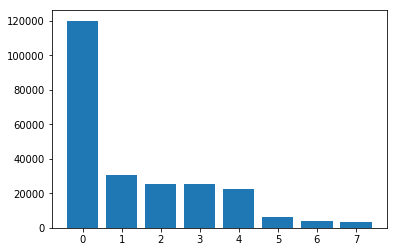

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


In [142]:
counts = tweets["candidate"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()

print(counts)

### Customizing plots
* Convert the created and user_created columns to the Pandas datetime type.
* Create a user_age column that is the number of days since the account was created.
* Create a histogram of user ages.
* Show the histogram.

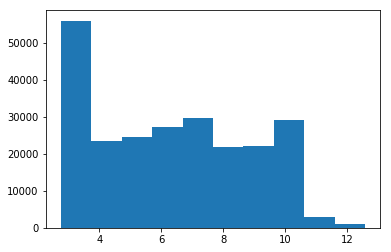

In [143]:
from datetime import datetime

tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])

tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)
plt.hist(tweets["user_age"])
plt.show()

#### Adding labels
* Generate the same histogram we did before.
* Draw a title onto the histogram.
* Draw an x axis label onto the histogram.
* Draw a y axis label onto the histogram.
* Show the plot.


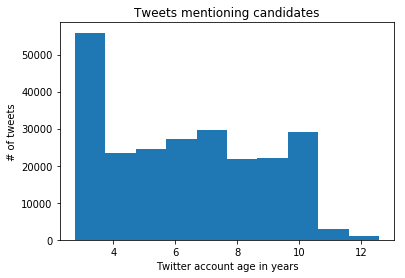

In [144]:
plt.hist(tweets["user_age"])
plt.title("Tweets mentioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

#### Making a stacked histogram

* Generate three Pandas series, each containing the user_age data only for tweets about a certain candidate.
* Make a stacked histogram by calling the hist method with additional options.
    * Specifying a list as the input will plot three sets of histogram bars.
    * Specifying stacked=True will stack the three sets of bars.
    * Adding the label option will generate the correct labels for the legend.
* Call the plt.legend method to draw a legend in the top right corner.
* Add a title, x axis, and y axis labels.
* Show the plot.

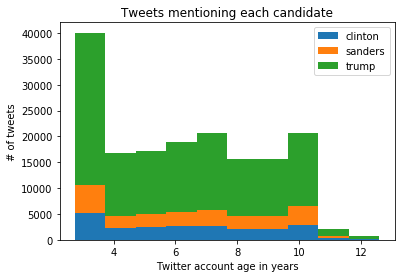

In [146]:
cl_tweets = tweets["user_age"][tweets["candidate"] == "clinton"]
sa_tweets = tweets["user_age"][tweets["candidate"] == "sanders"]
tr_tweets = tweets["user_age"][tweets["candidate"] == "trump"]
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

#### Annotating the histogram

In the code below, we'll make the same histogram as we did above, but we'll call the plt.annotate method to add an annotation to the plot.

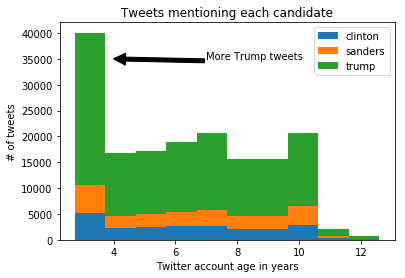

In [167]:
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.annotate('More Trump tweets', xy=(4, 35000), xytext=(7, 35000),
            arrowprops=dict(facecolor='black'))
plt.show()

### Multiple subplots
#### Extracting colors
* Use the apply method to go through each row in the user_bg_color column, and extract how much red is in it.
* Use the apply method to go through each row in the user_bg_color column, and extract how much blue is in it.

In [168]:
import matplotlib.colors as colors

tweets["red"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[0])
tweets["blue"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[2])

#### Creating the plot
* Generate a Figure and multiple Axes with the subplots method. The axes will be returned as an array.
* The axes are returned in a 2x2 NumPy array. We extract each individual Axes object by using the flat property of arrays. This gives us 4 Axes objects we can work with.
* Plot a histogram in the first Axes using the hist method.
* Set the title of the first Axes to Red in all backgrounds using the set_title method. This performs the same function as plt.title.
* Plot a histogram in the second Axes using the hist method.
* Set the title of the second Axes to Red in Trump tweeters using the set_title method.
* Plot a histogram in the third Axes using the hist method.
* Set the title of the third Axes to Blue in all backgrounds using the set_title method. This performs the same function as plt.title.
* Plot a histogram in the fourth Axes using the hist method.
* Set the title of the fourth Axes to Blue in Trump tweeters using the set_title method.
* Call the plt.tight_layout method to reduce padding in the graphs and fit all the elements.
* Show the plot.

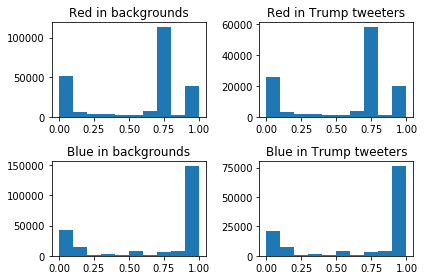

In [169]:
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat

ax0.hist(tweets["red"])
ax0.set_title('Red in backgrounds')

ax1.hist(tweets["red"][tweets["candidate"] == "trump"].values)
ax1.set_title('Red in Trump tweeters')

ax2.hist(tweets["blue"])
ax2.set_title('Blue in backgrounds')

ax3.hist(tweets["blue"][tweets["candidate"] == "trump"].values)
ax3.set_title('Blue in Trump tweeters')

plt.tight_layout()
plt.show()

#### Removing common background colors
Here's how to find the most common colors in background colors:

In [171]:
tweets["user_bg_color"].value_counts()

C0DEED    108977
000000     31119
F5F8FA     25597
131516      7731
1A1B1F      5059
022330      4300
0099B9      3958
642D8B      3767
FFFFFF      3101
9AE4E8      2651
ACDED6      2383
352726      2338
C6E2EE      1978
709397      1518
EBEBEB      1475
FF6699      1370
BADFCD      1336
FFF04D      1300
EDECE9      1225
B2DFDA      1218
DBE9ED      1113
ABB8C2      1101
8B542B      1073
3B94D9       623
89C9FA       414
DD2E44       351
94D487       318
4A913C       300
9266CC       287
F5ABB5       267
           ...  
BAE0F5         1
FBFBFB         1
F0488B         1
D0DBE0         1
878287         1
13BEED         1
233B47         1
8A2D5F         1
AA86B1         1
C2CC31         1
2028BD         1
332524         1
E50E06         1
8A868A         1
EAEBED         1
FCA9FC         1
993893         1
C20E0E         1
BF6F9C         1
FF7105         1
2288CC         1
F38630         1
09090A         1
1F1A1E         1
D9007E         1
5590AD         1
300030         1
0B4C5F        

* Remove C0DEED, 000000, and F5F8FA from user_bg_color.
* Create a function with out plotting logic from the last chart inside.
* Plot the same 4 plots from before without the most common colors in user_bg_color.

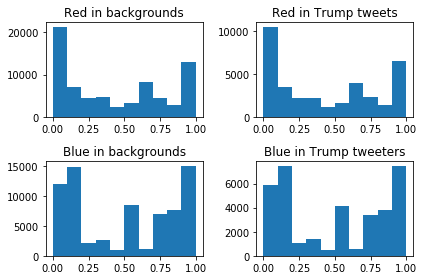

In [172]:
tc = tweets[~tweets["user_bg_color"].isin(["C0DEED", "000000", "F5F8FA"])]

def create_plot(data):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax0, ax1, ax2, ax3 = axes.flat

    ax0.hist(data["red"])
    ax0.set_title('Red in backgrounds')

    ax1.hist(data["red"][data["candidate"] == "trump"].values)
    ax1.set_title('Red in Trump tweets')

    ax2.hist(data["blue"])
    ax2.set_title('Blue in backgrounds')

    ax3.hist(data["blue"][data["candidate"] == "trump"].values)
    ax3.set_title('Blue in Trump tweeters')

    plt.tight_layout()
    plt.show()

create_plot(tc)

### Plotting sentiment
* Group tweets by candidate, and compute the mean and standard deviation for each numerical column (including polarity).
* Create a Figure that's 7 inches by 7 inches, with 2 Axes objects, arranged vertically.
* Create a bar plot of the standard deviation the first Axes object.
    * Set the tick labels using the set_xticklabels method, and rotate the labels 45 degrees using the rotation argument.
    * Set the title.
* Create a bar plot of the mean on the second Axes object.
    * Set the tick labels.
    * Set the title.
* Show the plot.

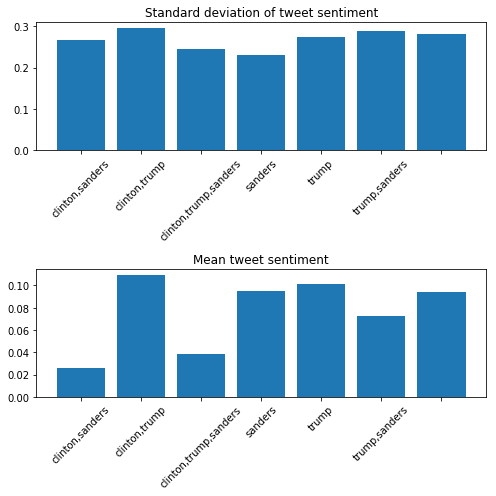

In [173]:
gr = tweets.groupby("candidate").agg([np.mean, np.std])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
ax0, ax1 = axes.flat

std = gr["polarity"]["std"].iloc[1:]
mean = gr["polarity"]["mean"].iloc[1:]
ax0.bar(range(len(std)), std)
ax0.set_xticklabels(std.index, rotation=45)
ax0.set_title('Standard deviation of tweet sentiment')

ax1.bar(range(len(mean)), mean)
ax1.set_xticklabels(mean.index, rotation=45)
ax1.set_title('Mean tweet sentiment')

plt.tight_layout()
plt.show()

### Generating a side by side bar plot

#### Generating tweet lengths
* Define a function to mark a tweet as short if it's less than 100 characters, medium if it's 100 to 135 characters, and long if it's over 135 characters.
* Use apply to generate a new column tweet_length.
* Figure out how many tweets by each candidate fall into each group.

In [175]:
def tweet_lengths(text):
    if len(text) < 100:
        return "short"
    elif 100 <= len(text) <= 135:
        return "medium"
    else:
        return "long"

tweets["tweet_length"] = tweets["text"].apply(tweet_lengths)

tl = {}
for candidate in ["clinton", "sanders", "trump"]:
    tl[candidate] = tweets["tweet_length"][tweets["candidate"] == candidate].value_counts()

#### Plotting
* Create a Figure and a single Axes object.
* Define the width for each bar, .5.
* Generate a sequence of values, x, that is 0, 2, 4. Each value is the start of a category, such as short, medium, and long. We put a distance of 2 between each category so we have space for multiple bars.
* Plot clinton tweets on the Axes object, with the bars at the positions defined by x.
* Plot sanders tweets on the Axes object, but add width to x to move the bars to the right.
* Plot trump tweets on the Axes object, but add width * 2 to x to move the bars to the far right.
* Set the axis labels and title.
* Use set_xticks to move the tick labels to the center of each category area.
* Set tick labels.

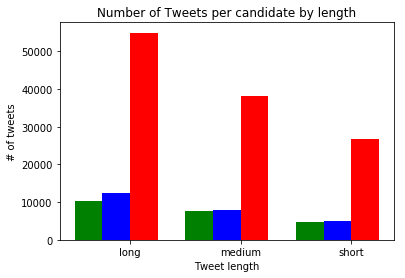

In [177]:

fig, ax = plt.subplots()
width = .5
x = np.array(range(0, 6, 2))
ax.bar(x, tl["clinton"], width, color='g')
ax.bar(x + width, tl["sanders"], width, color='b')
ax.bar(x + (width * 2), tl["trump"], width, color='r')

ax.set_ylabel('# of tweets')
ax.set_title('Number of Tweets per candidate by length')
ax.set_xticks(x + (width * 1.5))
ax.set_xticklabels(('long', 'medium', 'short'))
ax.set_xlabel('Tweet length')
plt.show()

* Suppose that you would now like to plot some of the results by state. As you will see,
the state information is sometimes missing, and other times it comes in varying forms.
Figure out how to aggregate the results by state. The challenge here: how many of the
tweets can you (correctly) assign to a state? Note: depending on how well you want to
do (i.e., how many tweets you want to correctly assign to their state), this is not an easy
problem!

In [64]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}
import re
def getStateFromLocation(location):
    # search for the state abbreviation or full name in the string
    for key,value in states.items():
        if re.search(r'\b' + key + r'\b',location):
            return value
        elif re.search(r'\b' + value + r'\b',location):
            return value
    # found no state
    return np.nan
    

In [42]:
import json
import reverse_geocode as rg
import geocoder
import numpy as np

# the coordinates are given as a json string
# parse the string into a dictionary
def getCoordinates(geo):
    g = json.loads(geo)
    return g["coordinates"]
    
def getStateFromCoord(coord):
    if not coord:
        return np.nan
    location = rg.search(coord)
    state = np.nan
    if location:
        state = location[0]['admin1']
    return state

def getStateFromLoc(loc):
    location = geocoder.arcgis(loc)
    state = np.nan
    if location: 
        coord = [location.json['lat'],location.json['lng']]
        state = getStateFromCoord(coord)
    return state

def getState(row):
    state = np.nan
    # try to get the state from a geolocation
    # or from the user's location
    geo = row["geo"]
    loc = row["user_location"]
    # map the geolocation to a state
    if(pd.isna(geo) == False):
        try:
            coord = getCoordinates(geo)
            state = getStateFromCoord(coord)
        except:
            return np.nan
    # map the location to a state
    elif(pd.isna(loc) == False):
        try:
            state = getStateFromLocation(loc)
        except:
            return np.nan
    return state

In [65]:
tweets["state"] = tweets.apply(getState,axis=1)

In [66]:
tweets.head()

id              id_str    user_location user_bg_color  retweet_count  \
0   1  729828033092149248      Wheeling WV        022330              0   
1   2  729828033092161537              NaN        C0DEED              0   
2   3  729828033566224384              NaN        C0DEED              0   
3   4  729828033893302272           global        C0DEED              0   
4   5  729828034178482177  California, USA        131516              0   

       user_name  polarity              created  geo  \
0     Jaybo26003      0.00  2016-05-10T00:18:57  NaN   
1  brittttany_ns      0.15  2016-05-10T00:18:57  NaN   
2   JeffriesLori      0.00  2016-05-10T00:18:57  NaN   
3    WhorunsGOVs      0.00  2016-05-10T00:18:57  NaN   
4       BJCG0830      0.00  2016-05-10T00:18:57  NaN   

                                    user_description         user_created  \
0                                                NaN  2011-11-17T02:45:42   
1                                        18 // PSJAN  2012-12-24T17:33:12   
2                                                NaN  2012-10-11T14:29:59   
3    Get Latest Global Political news as they unfold  2014-02-16T07:34:24   
4  Queer Latino invoking his 1st amendment privil...  2009-03-21T01:43:26   

   user_followers coordinates  subjectivity  \
0              39         NaN           0.0   
1            1175         NaN           0.1   
2              42         NaN           0.0   
3             290         NaN           0.0   
4             354         NaN           0.0   

                                                text          state  
0  Make a difference vote! WV Bernie Sanders Coul...  West Virginia  
1  RT @HlPHOPNEWS: T.I. says if Donald Trump wins...            NaN  
2  You have no one to blame but yourselves if Tru...            NaN  
3  'Ruin the rest of their lives': Donald Trump c...            NaN  
4  RT @elianayjohnson: Per source, GOP megadonor ...     California

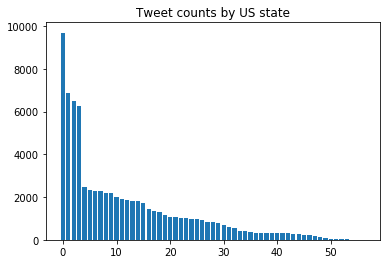

California                  9690
Texas                       6868
New York                    6511
Florida                     6257
Washington                  2472
North Carolina              2344
Pennsylvania                2303
District of Columbia        2278
New Jersey                  2213
Georgia                     2191
Arizona                     2023
Ohio                        1906
Virginia                    1856
Illinois                    1837
Tennessee                   1828
Michigan                    1715
Colorado                    1461
Massachusetts               1337
Oregon                      1324
Indiana                     1164
Minnesota                   1089
South Carolina              1071
Alabama                     1026
Maryland                    1004
Louisiana                    991
Wisconsin                    990
Nevada                       935
Missouri                     832
Connecticut                  812
Oklahoma                     806
Kentucky  

In [71]:
counts = tweets["state"].value_counts()
plt.bar(range(len(counts)), counts)
plt.title('Tweet counts by US state')
plt.show()

print(counts)